In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import e

In [2]:
def f_Q(q):
  if q <= 1 and q >= 0:
    out = q * e**(q)
  else:
    out = 0
  return out

In [3]:
def f_QA(x):
  return x
  # return (x**3 * (1-x) * e**x)/(30 - 11*e)

In [4]:
def get_pdf_weights(q,fQ):
  weights = np.array(fQ)*(q[1]-q[0])
  diff = 1 - np.sum(weights)
  if np.abs(diff) <= 1e-2:
    weights[-1] = weights[-1] + diff
  else:
    raise('The PDF must sum to 1 or be close to 1.')
  return weights

Text(0.5, 1.0, 'Prior PDF of Q')

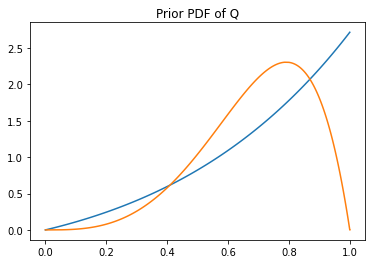

In [5]:
q = np.linspace(0,1,100000)
fQ = [f_Q(x) for x in q]
fQA = [(x**3 * (1-x) * e**x)/(30 - 11*e) for x in q]
plt.step(q,fQ)
plt.step(q,fQA)
plt.title('Prior PDF of Q')

In [6]:
out = []
for i in range(0,100):
  select = np.random.choice(q)
  temp = f_QA(select)
  out.append(temp)

In [7]:
np.mean(out)

0.482079920799208

In [8]:
np.random.choice(fQ)
coin = np.random.choice(fQ)

In [9]:
coin==fQ
Q = q[np.array(coin==fQ)]
Q[0]

0.46396463964639645

In [18]:
N = 10000 # number of times to perform experiment
weights = get_pdf_weights(q,fQ)
outcomes = []
conditional = []
conditional_2 = []
conditional_b = []
conditional_c = []
conditional_H = []
for n in range(N):
  Q = np.random.choice(q,p=weights) # randomly select a coin
  experiment_i = ''
  for i in range(0,4): # flip a coin four times
    flip_i = np.random.sample() # flip a coin
    if flip_i <= Q: # if heads obtained
      out = 'H'
    else:
      out = 'T'
    experiment_i += out
  outcomes.append(experiment_i)
  if 'HHT' in experiment_i[0:3] or 'HTH' in experiment_i[0:3] or 'THH' in experiment_i[0:3]:
    conditional.append(experiment_i)
    if 'H' in experiment_i[-1]:
      conditional_2.append(experiment_i)
    if 'H' in experiment_i[0]:
      conditional_b.append(experiment_i)
  if 'H' in experiment_i[-1]:
    conditional_H.append(experiment_i)
    if 'HHT' in experiment_i[0:3] or 'HTH' in experiment_i[0:3] or 'THH' in experiment_i[0:3]:
      conditional_c.append(experiment_i)

In [19]:
len(conditional_2)/len(conditional)

0.6931933626820183

In [20]:
len(conditional)/N

0.2953

In [21]:
len(conditional_b)/len(conditional)

0.6718591263122249

In [22]:
len(conditional_c)/len(conditional_H)

0.2860136928880816

In [23]:
len(conditional_2)/len(conditional) * len(conditional)/N / (len(conditional_H)/N)

0.2860136928880816